**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Loading Dataset**

In [2]:
traindata=pd.read_csv("train.csv")


In [3]:
traindata.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
traindata.shape

(7352, 563)

In [5]:
testdata=pd.read_csv("test.csv")

In [6]:
testdata.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [7]:
testdata.shape

(2947, 563)

**Data Preprocessing**

In [8]:
traindata.isnull().sum().any()  

False

In [9]:
testdata.isnull().sum().any()  

False

There are no missing values in train and test data

In [10]:
traindata.dtypes.value_counts()                    # Checking the datatypes of training dataset

float64    561
object       1
int64        1
dtype: int64

In [11]:
testdata.dtypes.value_counts()                    # Checking the datatypes of testing dataset

float64    561
object       1
int64        1
dtype: int64

In [12]:
traindata['Activity'].value_counts()                  # Checking the number of records for each labels

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

**Exploratory Data Analysis**

**Q1: How active are the participants**

In [13]:
# we are going to count how many sensor measurments are there for each activity for each partcipant
pivoted=traindata.pivot_table(index="subject",columns="Activity",aggfunc='count').iloc[:,:6]
count_df=pd.DataFrame(pivoted.to_records())        #convert pivot table to dataframe
count_df=count_df.set_index ("subject")         # Change the index
count_df.columns =["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
count_df

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
11,57,53,47,59,46,54
14,51,54,60,59,45,54
15,72,59,53,54,42,48


**Q2: How active are the participants in terms of Hours**

In [14]:
# SAMPLING IS DONE AT 1.28 SECONDS,SO THE TOTAL DURATION FOR ALL THE ACTIONS WILL BE COUNT 8 1.28
# THIS IS A SAMPLE ,WHICH IS WHY THE DURATION IS QUIET LESS.IF A PERSON WEARS THE TRACKER FOR THE ACTIVITIES
# YOU CAN MEASURE HOW MANY HOURS HE WALKS,SLEEPS,SITS..ETC..

duration_df_hrs=count_df * 1.28
duration_df_hrs

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,64.00,60.16,67.84,121.60,62.72,67.84
3,79.36,66.56,78.08,74.24,62.72,75.52
5,66.56,56.32,71.68,71.68,60.16,60.16
6,72.96,70.40,72.96,72.96,61.44,65.28
7,66.56,61.44,67.84,72.96,60.16,65.28
8,69.12,58.88,69.12,61.44,48.64,52.48
11,72.96,67.84,60.16,75.52,58.88,69.12
14,65.28,69.12,76.80,75.52,57.60,69.12
15,92.16,75.52,67.84,69.12,53.76,61.44


**Q3: Active and Passive hours of each participants**

In [15]:
# Feature Engineering : Creating new columns,active and passive
duration_df_hrs['active']= duration_df_hrs['WALKING']+duration_df_hrs['WALKING_UPSTAIRS']+duration_df_hrs['WALKING_DOWNSTAIRS']
duration_df_hrs['passive']=duration_df_hrs['LAYING']+duration_df_hrs['SITTING']+duration_df_hrs['STANDING']
duration_df_hrs

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,active,passive
subject,,,,,,,,
1,64.00,60.16,67.84,121.60,62.72,67.84,252.16,192.00
3,79.36,66.56,78.08,74.24,62.72,75.52,212.48,224.00
5,66.56,56.32,71.68,71.68,60.16,60.16,192.00,194.56
6,72.96,70.40,72.96,72.96,61.44,65.28,199.68,216.32
7,66.56,61.44,67.84,72.96,60.16,65.28,198.40,195.84
8,69.12,58.88,69.12,61.44,48.64,52.48,162.56,197.12
11,72.96,67.84,60.16,75.52,58.88,69.12,203.52,200.96
14,65.28,69.12,76.80,75.52,57.60,69.12,202.24,211.20
15,92.16,75.52,67.84,69.12,53.76,61.44,184.32,235.52


**Q4: Number of hours of Laying/Sitting/Standing of each participants in Training Dataset**

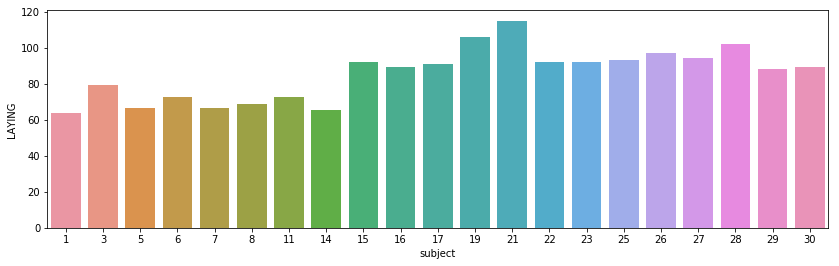

In [16]:
plt.figure(figsize=(14,4))
sns.barplot(x=duration_df_hrs.index,y=duration_df_hrs.LAYING)

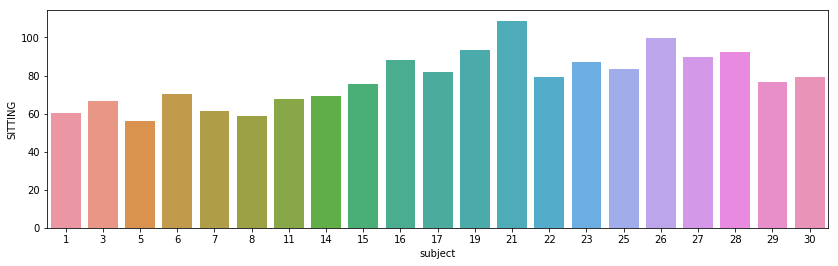

In [17]:
plt.figure(figsize=(14,4))
sns.barplot(x=duration_df_hrs.index,y=duration_df_hrs.SITTING)

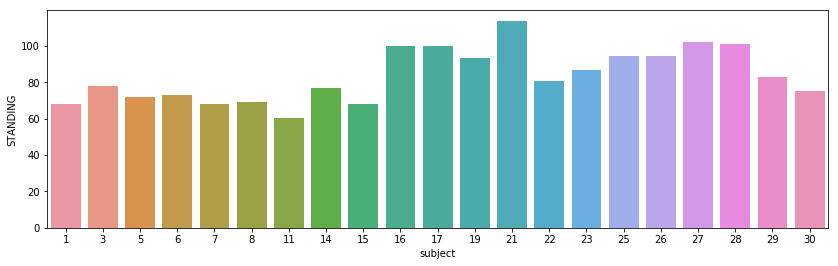

In [18]:
plt.figure(figsize=(14,4))
sns.barplot(x=duration_df_hrs.index,y=duration_df_hrs.STANDING)

**Q5: Active vs Passive hours of each participants of training dataset**

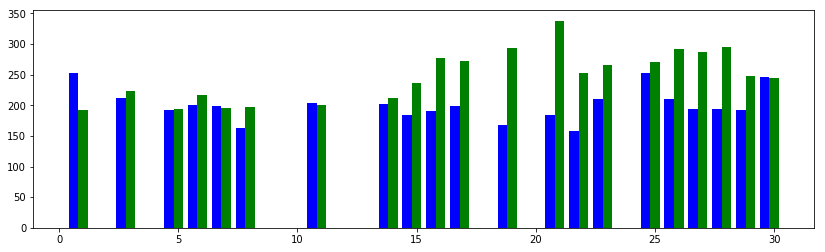

In [19]:
x=duration_df_hrs.index
plt.figure(figsize=(14,4))
ax=plt.subplot(111)
ax.bar(x-0.4, duration_df_hrs.active, width=0.4, color='b', align='center')
ax.bar(x, duration_df_hrs.passive, width=0.4, color='g', align='center')
plt.show()

#Observation: Person 19 and 21 are highly inactive

**Dataset Class Distributions**

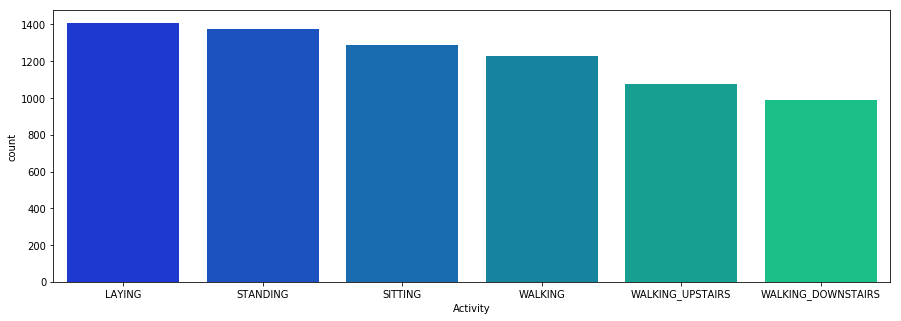

In [20]:
fig = plt.figure(figsize = (15, 5))
sns.countplot(x = 'Activity', 
              data = traindata, 
              #palette = "Blues_r",
              palette = 'winter',
              order = traindata['Activity'].value_counts().index
             )

The dataset does not have much of an imbalance in the classes.

In [21]:
time=np.arange(0,len(x_train),1)
_, axs = plt.subplots(4, figsize=(10,20))
for idx, ax in enumerate(axs):
    sensor=x_train.iloc[:,idx]
    ax.plot(time, sensor)

NameError: name 'x_train' is not defined

**Distribution of Attributes**

Distribution of attributes
It is important that we understand the distribution of the values in all the columns of our data, but as we have noticed, there are too many attributes (561 of them!). Surely, we cannot examine all of them. So, what shall we do?

Well we could just get a glimpse of the distribution by looking at the first 6 columns.

In [22]:
# Plots distribution of 6 columns

def plot_distribution(traindata, col):
    fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (15, 8))
    for i, ax in zip(range(6), axes.flat):
        sns.distplot(traindata[cols[i]], ax = ax)
    plt.show()

/Users/paulmathai/.virtualenvs/keras_tf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


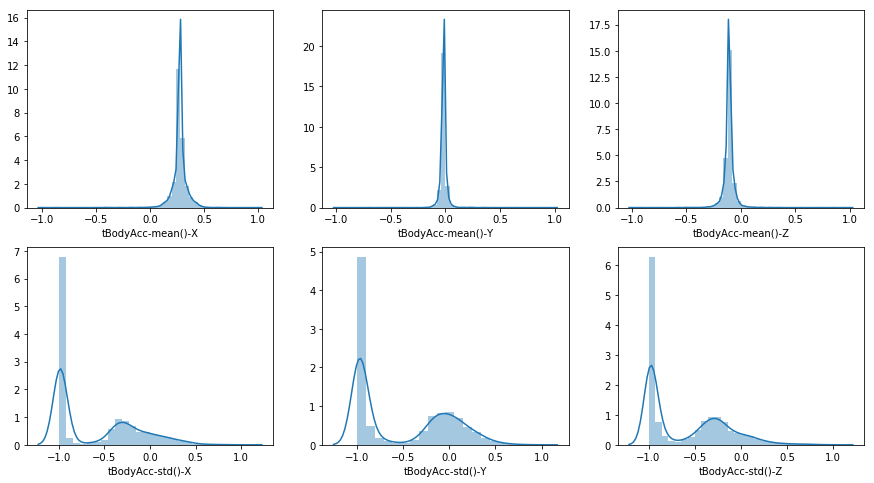

In [23]:
# Select some body acceleration attributes
cols = traindata.columns[:6]
plot_distribution(traindata, cols)

/Users/paulmathai/.virtualenvs/keras_tf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


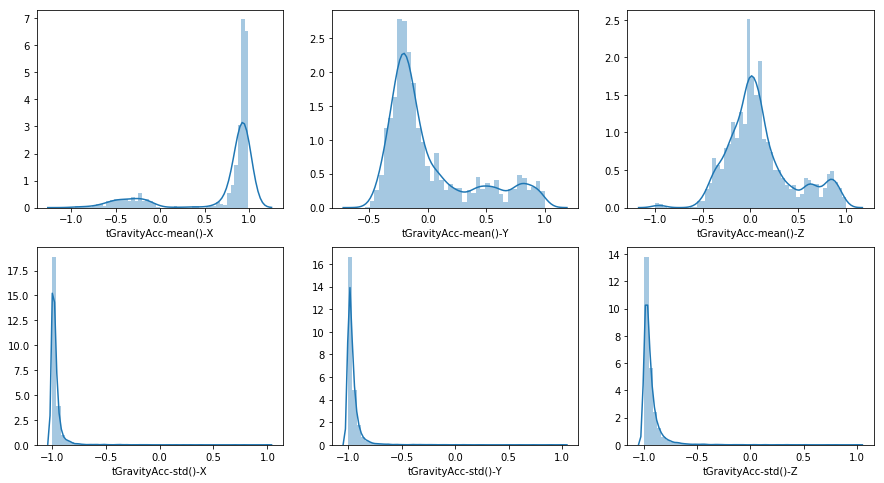

In [24]:
# Select some gravitational acceleration attributes
cols = traindata.columns[40:47]
plot_distribution(traindata, cols)

Some of the attributes are not nearly normally distributed. We observe skew in several gravitational acceleration measurements.

**Split training and testing Dataset with its input and output values** 

In [25]:
x_train=traindata.drop(['Activity','subject'],axis=1)
y_train=traindata['Activity']

In [26]:
x_train.shape

(7352, 561)

In [27]:
y_train.shape

(7352,)

In [28]:
x_test=testdata.drop(['Activity','subject'],axis=1)
y_test=testdata['Activity']

In [29]:
x_test.shape

(2947, 561)

In [30]:
y_test.shape

(2947,)

**Dimensionality Reduction: Visualization**

**Method 1: PCA**

In [31]:
# lets reduce the dimensions from 561 columns to 2 columns
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x_train)
principalDf = pd.DataFrame(principalComponents,columns=['pc1','pc2'])

In [32]:
principalDf.head()

,pc1,pc2
0,-5.520280,-0.290278
1,-5.535350,-0.082530
2,-5.474988,0.287387
3,-5.677232,0.897031
4,-5.748749,1.162952


In [33]:
finalDf=pd.concat([principalDf,y_train],axis=1)

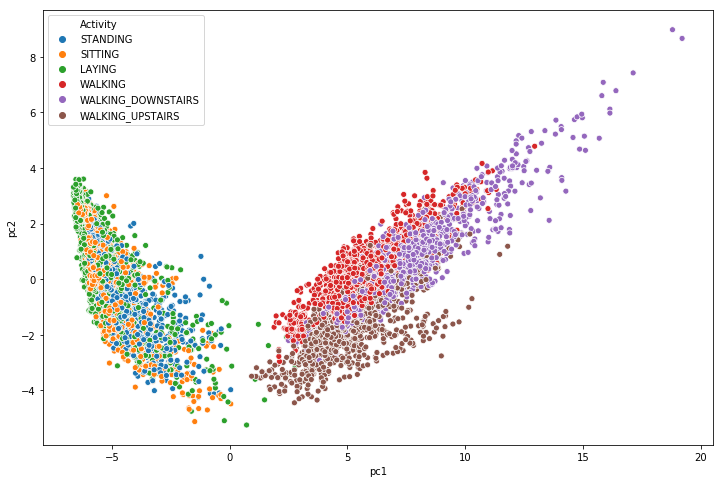

In [34]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(x='pc1',y='pc2',data=principalDf,hue=y_train)

In [35]:
from sklearn .decomposition import PCA
pca = PCA(n_components=3)
principalComponents=pca.fit_transform(x_train)
principalDf=pd.DataFrame(principalComponents,columns=['pc1','pc2','pc3'])

In [36]:
principalDf.head()

,pc1,pc2,pc3
0,-5.520280,-0.290277,-1.529929
1,-5.535350,-0.082530,-1.924804
2,-5.474988,0.287387,-2.144642
3,-5.677232,0.897031,-2.018219
4,-5.748749,1.162952,-2.139533


In [37]:
finalDf=pd.concat([principalDf,y_train],axis=1)

In [44]:
!pip install plotly_express==0.4.1

     |████████████████████████████████| 231 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 8.4 MB 4.1 MB/s eta 0:00:01


In [51]:
import plotly.express as px
fig=px.scatter_3d(finalDf,x="pc1",y="pc2",z="pc3",color="Activity",color_discrete_map={"pc1": "pc2","pc3":"green"})
fig.show()

#Observations: Here we are able to see all the different activities using 3 principal components.

**Method 2: TSNE**

In [40]:
from sklearn.manifold import TSNE

In [41]:
labels = traindata['Activity']
label_counts = labels.value_counts()

In [42]:
tsne = TSNE(random_state = 0)
tsne_transformed = tsne.fit_transform(x_train)

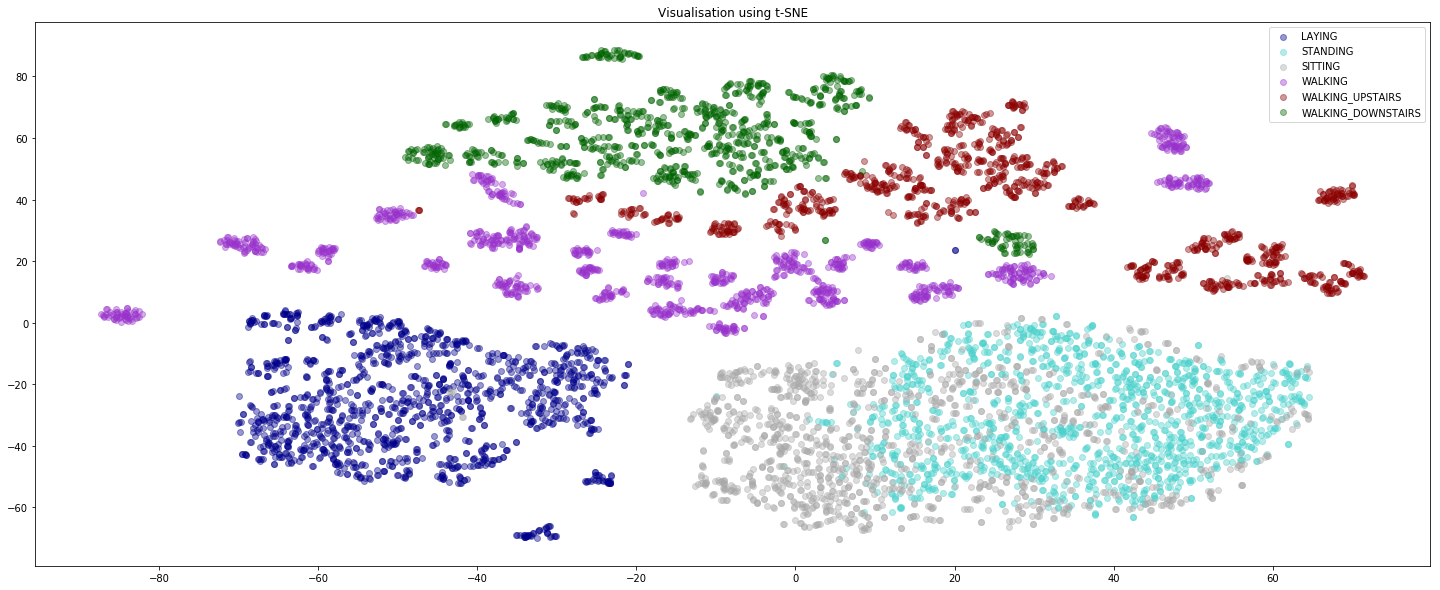

In [43]:
fig1 = plt.figure(figsize = (25, 10))
colors = ['darkblue', 'mediumturquoise', 'darkgray', 'darkorchid', 'darkred', 'darkgreen']
for i, activity in enumerate(label_counts.index):
    mask = (labels == activity).values
    plt.scatter(x = tsne_transformed[mask][:,0],
                y = tsne_transformed[mask][:,1],
                color = colors[i],
                alpha = 0.4,
                label = activity)
plt.title('Visualisation using t-SNE')
plt.legend()
plt.show()